Jared Hawkins - jmh7ax

In this exercise, you are going to use Principal Component Analysis to find the most relevant dimensions of variance in a set of hand shapes. Load the matrix all-hands.dat. Each row of this matrix is an entire set of hand points as a list of x, y coordinates: (x1, y1, x2, y2, . . . , x72, y72).
Do the following:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


all_hands = pd.read_csv("all-hands.dat")
display(all_hands)
df = pd.DataFrame(all_hands)

,296,509,305,481,329,465,350,443,365,417,...,136.2,369,141,407,152,442,153,477,142.1,511
0,284,511,299,488,321,471,335,449,348,426,...,127,369,131,406,140,442,141,477,126,510
1,293,510,310,490,328,472,340,450,352,427,...,126,375,130,410,137,444,145,476,133,507
2,310,506,323,483,345,466,359,443,372,419,...,143,375,148,411,158,445,165,479,156,511
3,334,509,351,490,369,472,381,449,392,427,...,160,377,165,412,174,444,185,476,181,509
4,316,511,330,489,351,471,365,450,378,427,...,143,380,149,415,160,448,171,481,162,511
5,284,508,295,481,311,457,332,437,349,412,...,119,370,126,405,140,439,143,473,133,508
6,351,507,365,484,383,465,394,441,403,417,...,174,383,179,417,188,449,203,480,197,511
7,301,509,314,489,333,473,350,455,366,436,...,136,370,141,406,150,441,154,477,140,510
8,317,502,330,481,351,467,367,446,381,426,...,141,365,146,398,154,430,168,460,161,490
9,267,507,285,491,302,473,314,453,325,433,...,97,380,98,415,105,448,115,480,103,511


(a) Compute the mean hand (this should be a 72 × 2 = 144 vector, consisting of the means of each column in your matrix). Plot this mean as a hand shape.

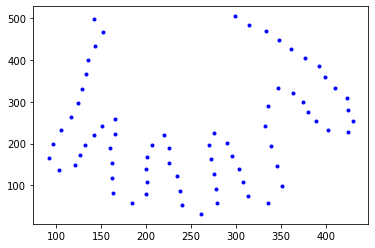

In [2]:
mean_hand = all_hands.apply(np.mean, axis=0)
#display(mean_hand)

x = [mean_hand.values[0::2]]
y = [mean_hand.values[1::2]]
#display(x)
#display(y)

hand = plt.plot(x, y, color="blue", marker='.')

(b) Compute the covariance matrix Σ for this data. Use the formulas we covered in class, not a covariance function! What is the total variance of the data?

In [8]:
centered = np.matrix(all_hands).copy().astype("float64")

means = np.array(sum(np.matrix(all_hands))/len(np.matrix(all_hands)))[0]

for row in range(len(np.matrix(all_hands))):
    centered[row] = centered[row] - means

covariance_matrix = np.matmul(centered.T,(centered))/(len(all_hands)-1)

print(covariance_matrix)



[[582.80882353  -3.77573529 564.72058824 ...  50.19117647 638.34558824
   48.27941176]
 [ -3.77573529  32.25735294  -3.76838235 ...  53.90073529  -7.76838235
   53.89338235]
 [564.72058824  -3.76838235 552.01470588 ...  43.02941176 615.82720588
   39.48529412]
 ...
 [ 50.19117647  53.90073529  43.02941176 ... 162.55882353  40.46691176
  165.47058824]
 [638.34558824  -7.76838235 615.82720588 ...  40.46691176 708.63970588
   40.42279412]
 [ 48.27941176  53.89338235  39.48529412 ... 165.47058824  40.42279412
  170.38970588]]


(c) What is the covariance between the x1 coordinate and the x2 coordinate? What is the correlation between these two coordinates? These are adjacent points on the hand, can you explain why the correlation comes out to this value?

In [4]:
covariancex1x2 = covariance_matrix[0,2]
print(covariancex1x2)

564.7205882352939


In [28]:
print(all_hands.values[0])
print(covariancex1x2 / (np.std(all_hands.values[0]) * np.std(all_hands.values[2])))

[284 511 299 488 321 471 335 449 348 426 363 403 379 381 384 352 392 326
 404 300 405 271 411 243 404 217 382 223 369 243 360 266 356 289 349 312
 335 331 330 285 326 238 331 191 336 144 340  96 325  56 303  72 298 104
 294 137 286 168 282 200 270 225 266 194 270 160 275 126 280  91 284  57
 269  30 246  50 240  84 234 118 222 150 222 185 217 219 209 193 209 163
 213 135 219 107 224  79 212  57 187  78 178 112 171 148 163 183 167 219
 164 255 156 234 152 210 147 186 146 161 144 136 130 119 113 147 113 184
 115 222 122 257 122 295 125 333 127 369 131 406 140 442 141 477 126 510]
0.04697591184807894


The correlation is very low. I can not explain how the correlation came out to this value. If the points were adjacent, they should have high correlation.

(d) Compute the PCA of the hands. (Use the Python function numpy.linalg.eigh to get eigenvalues and eigenvectors of Σ).

In [224]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix.tolist())
print(eigenvalues)
print(eigenvectors)

[ 2.64242307e+04+0.00000000e+00j  8.47523878e+03+0.00000000e+00j
  5.65764544e+03+0.00000000e+00j  4.24397101e+03+0.00000000e+00j
  2.63458872e+03+0.00000000e+00j  1.38598208e+03+0.00000000e+00j
  4.33193429e+02+0.00000000e+00j  2.29431554e+02+0.00000000e+00j
  1.34915924e+02+0.00000000e+00j  6.04636001e+01+0.00000000e+00j
  4.15937583e+01+0.00000000e+00j  3.30193427e+01+0.00000000e+00j
  2.84902079e+01+0.00000000e+00j  8.57811657e+00+0.00000000e+00j
  1.81185733e+01+0.00000000e+00j  1.68623377e+01+0.00000000e+00j
 -1.84991977e-12+0.00000000e+00j -5.29843334e-13+1.58057281e-12j
 -5.29843334e-13-1.58057281e-12j  1.24084956e-12+1.00853756e-12j
  1.24084956e-12-1.00853756e-12j -1.22164907e-12+5.10884348e-13j
 -1.22164907e-12-5.10884348e-13j  1.32097677e-12+0.00000000e+00j
  4.83964777e-13+1.14133550e-12j  4.83964777e-13-1.14133550e-12j
  1.14630638e-12+4.81623096e-13j  1.14630638e-12-4.81623096e-13j
 -8.42920975e-13+8.44455524e-13j -8.42920975e-13-8.44455524e-13j
 -1.08676024e-12+1.993720

(e) Plot a scree plot of the eigenvalues. How many eigenvalues are nonzero? What does this tell you about the dimensionality of your data?

16


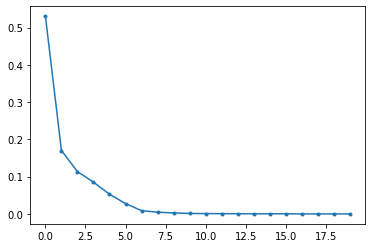

In [225]:
prob_var = []
count = 0
for i in range(len(eigenvalues)):
    prob_var.append(eigenvalues[i]/np.sum(eigenvalues))
    if(eigenvalues[i]/np.sum(eigenvalues) > .0000000000000001):
        count = count + 1
    
plt.plot(prob_var[:20], marker = ".")
print(count)

There were 16 nonzero eigen values, which means 16 dimensions should account for all of the variance in the data

(f) Plot a sequence (as a strip of 5 side-by-side figures) of hand shapes along the first
√√√√
principal component at s = −3 λ1, −1.5 λ1, 0, 1.5 λ1, 3 λ1, where λ1 is the first
(largest) eigenvalue. So, you will plot hands corresponding to: μ+sv1,
where v1 is the first eigenvector. What does this dimension in the data correspond to, in terms of hand shape changes? Repeat this process for the second and third principal component.

In [226]:
v1 = [-3 * np.sqrt(eigenvalues[1]), -1.5 * np.sqrt(eigenvalues[1]), 0, 1.5 * np.sqrt(eigenvalues[1]), 3 * np.sqrt(eigenvalues[1])]
v2 = [-3 * np.sqrt(eigenvalues[2]), -1.5 * np.sqrt(eigenvalues[2]), 0, 1.5 * np.sqrt(eigenvalues[2]), 3 * np.sqrt(eigenvalues[2])]
v3 = [-3 *  np.sqrt(eigenvalues[3]), -1.5 *  np.sqrt(eigenvalues[3]), 0, 1.5 *  np.sqrt(eigenvalues[3]), 3 *  np.sqrt(eigenvalues[3])]

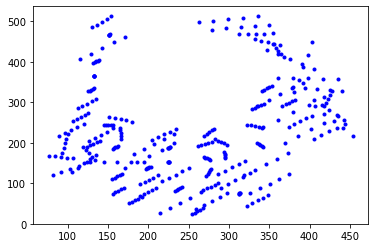

In [227]:
for i in range(len(v1)):
    vector1 = all_hands.apply(np.mean, axis=0) + v1[i] * eigenvectors[0]
    xv1 = [vector1.values[0::2]]
    yv1 = [vector1.values[1::2]]
    plt.plot(xv1, yv1, color = "blue", marker='.')

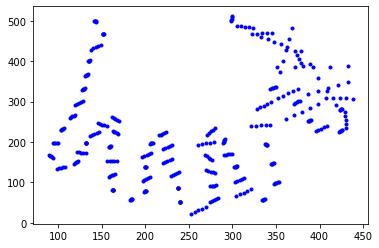

In [228]:
for i in range(len(v2)):
    vector2 = all_hands.apply(np.mean, axis=0) + v2[i] * eigenvectors[1]
    xv1 = [vector2.values[0::2]]
    yv1 = [vector2.values[1::2]]
    plt.plot(xv1, yv1, color = "blue", marker='.')

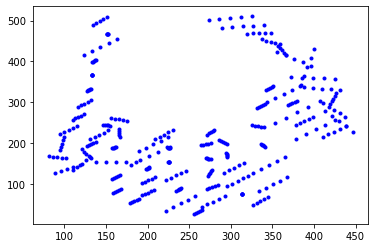

In [229]:
for i in range(len(v3)):
    vector3 = all_hands.apply(np.mean, axis=0) + v3[i] * eigenvectors[0]
    xv3 = [vector3.values[0::2]]
    yv3 = [vector3.values[1::2]]
    plt.plot(xv3, yv3, color = "blue", marker=".")

(g) How many dimensions do you need to represent 95% of the variance in the hand data?

In [230]:
count1 = 0
total = 0
for i in range(len(eigenvalues)):
    total = total + eigenvalues[i] / sum(eigenvalues)
    count1 = count1 + 1
    if total >= .95:
        break;

print(count1)

5


We need 5 dimensions to represent 95% of the variance in the hand data

(h) Using your PCA results with the reduced number of dimensions you found in the previ- ous answer, project the first hand (row 1 of the matrix) onto this reduced dimensional subspace. What is the vector of weights needed to represent this hand? Plot the recon- structed hand shape on top of the original hand shape (again, use two different colors). Is the reconstructed hand similar to the original?

[[-6.24548667e-01-4.94487646e-01j -1.21514935e-01-9.62096905e-02j
  -6.09465811e-01-4.82545764e-01j -1.07415378e-01-8.50463384e-02j
  -3.54846560e-01-2.80950468e-01j -2.00006329e-02-1.58355407e-02j
   2.60283174e-01+2.06079719e-01j -1.29729470e-01-1.02713565e-01j
   1.14287394e-01+9.04872708e-02j -2.76938020e-01-2.19266227e-01j
   5.00570120e-01+3.96327385e-01j -4.10002380e-01-3.24620198e-01j
   1.87992735e-01+1.48843620e-01j  1.05106157e+00+8.32180080e-01j
  -6.36477582e-01-5.03932388e-01j  3.80863807e-02+3.01549675e-02j
  -5.28462874e-01-4.18411529e-01j -7.03948785e-02+2.63645425e-01j
   2.40472152e-01-1.28986406e-01j -2.67567873e-02+6.84592323e-01j
   6.60206493e-01-1.83057263e-01j -2.34757884e-01-5.39423393e-01j
  -5.78886643e-01-1.04781275e-01j  6.21297626e-01+4.91913628e-01j
  -1.16169790e-01-5.31243337e-01j -5.43726033e-01+8.76951023e-03j
   6.35739954e-01+3.48223600e-01j  4.84750320e-01+5.38926796e-01j
   1.34050884e-01+3.29762758e-01j  3.51717383e-01+5.48452301e-02j
   6.27035

/Users/jaredhawkins/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


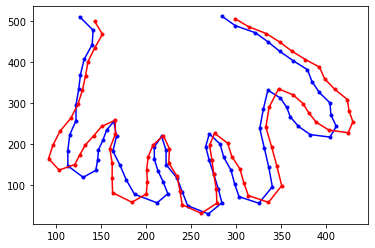

In [234]:
original = centered[0]

originalx = np.array(all_hands)[0][0::2]
originaly = np.array(all_hands)[0][1::2]
plt.plot(first_x, first_y, color = "blue", marker='.')

meansx = [mean_hand.values[0::2]]
meansy = [mean_hand.values[1::2]]
meansarray = np.array([mean_hand.values[0:]])[0]

weightvector = [0] * 144

for i in range(len(original)):
    weightvector += (original.dot(eigenvectors[i])) * eigenvectors[i]
  
newarray = np.array(meansarray + vectors)[0]
newx = newarray[0::2]
newy = newarray[1::2]

print(weightvector)
plt.plot(newx, newy, color = "red", marker='.')

The hand is very similar.